## TP1 Visión por Computadora

Parte 1 (imagenes /white_patch y /coord_cromaticas):

1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.

2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White Patch.

Parte 2:

1. Para las imagenes img1_tp.png y img2_tp.png leerlas con OpenCV en escalas de grises y visualizarlas.

2. Elija el número de bins crea conveniente y grafique su histograma, compare los histogramas entre sí. Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, ¿cónsidera que puede ser de utilidad tomar como **"features"** a los histogramas?.

3. Para la imagen **segmentacion.png** analice el histograma de canales **RGB**. Segmente algunos de los elementos presentes en la imagen (agua, cielo y tierra) y muestre, aplicando mascaras, las regiones en imagenes separadas.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from scipy.signal import find_peaks as findPeaks

Carga de las imagenes

In [ ]:
# Lectura de la imagen
img_1 = cv2.imread('/content/sample_data/CoordCrom_1.png')
img_2 = cv2.imread('/content/sample_data/CoordCrom_2.png')
img_3 = cv2.imread('/content/sample_data/CoordCrom_3.png')


Visualización de las imagenes

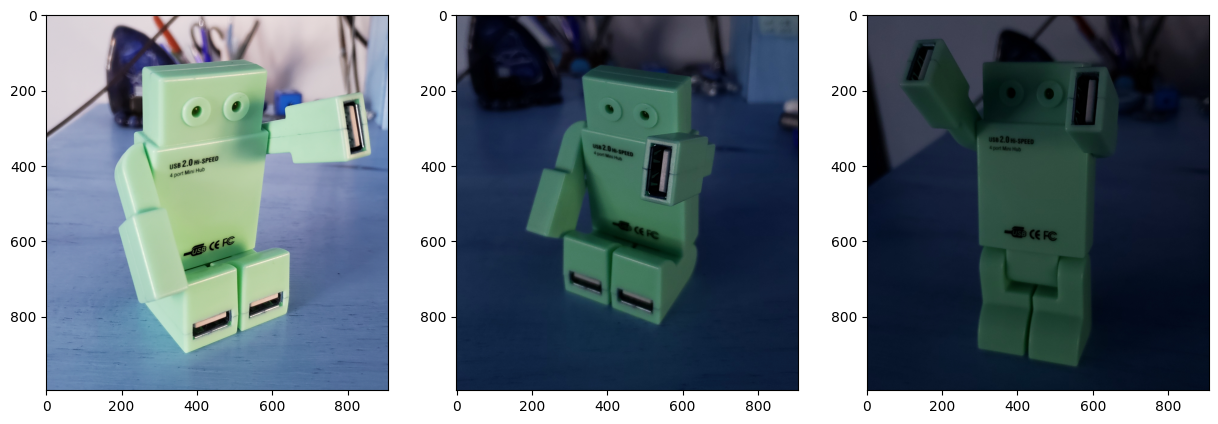

In [ ]:
# Prepara el figure para mostrar las imagenes
fig, ax = plt.subplots(1,3, figsize=(15,10))

ax[0].imshow(img_1)
ax[1].imshow(img_2)
ax[2].imshow(img_3)

plt.show()

Reordenamiento de los canales

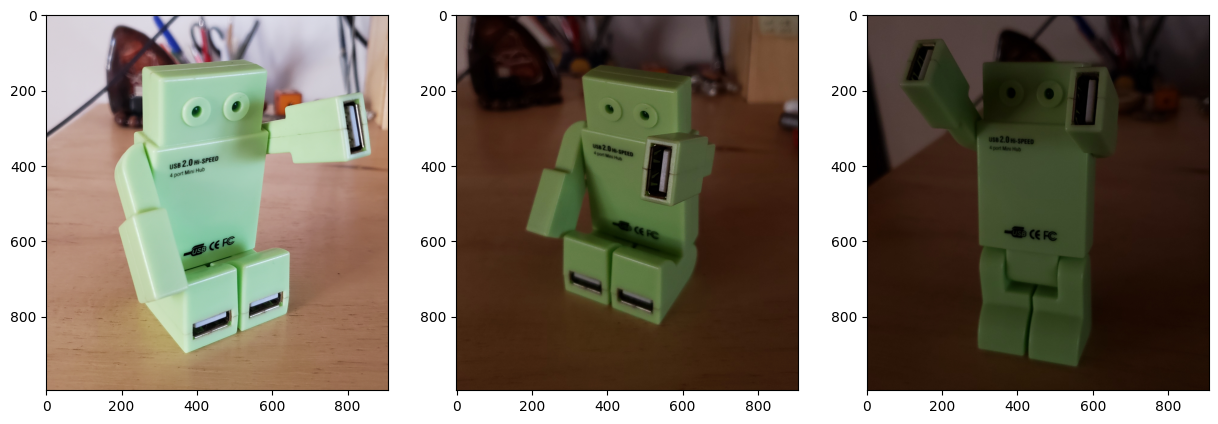

In [ ]:
# Cambiael orden de los canales de BGR a RGB
img_1_rgb = img_1[::,::,::-1]
img_2_rgb = img_2[::,::,::-1]
img_3_rgb = img_3[::,::,::-1]

# Prepara el figure para el plot
fig, ax = plt.subplots(1,3, figsize=(15,10))

ax[0].imshow(img_1_rgb)
ax[1].imshow(img_2_rgb)
ax[2].imshow(img_3_rgb)

plt.show()

Las imagenes como las que se muestran refieren un desafio para su tratamiento dado que estamos en presencia de imagenes con problemas de iluminación. Como es el caso de las imágenes **"CoordCrom_2.png"** y **"CoordCrom_3.png"**. Por lo que sería necesario utilizar el algoritmo de pasaje a coordenadas cromáticas, dado que esta técnica minimiza las variaciones contraste por cambios en la iluminación.

In [ ]:
def transformacion_cromatica(img):
    # Convertir la imagen a un array de NumPy
    img_array = np.array(img)

    # Calcular la suma de los canales para cada píxel
    sumas = np.sum(img_array, axis=2)

    # Crear una máscara para los píxeles con suma 0
    mascara = sumas != 0

    # Dividir cada píxel por la suma de sus canales
    # En caso de encontrar problemas con la división por cero lo sustituye por [0, 0, 0]
    img_transformada = np.where(mascara[:, :, None], img_array / sumas[:, :, None], [0, 0, 0])

    return img_transformada

<ipython-input-120-c9b6dc38f7b8>:13: RuntimeWarning: invalid value encountered in divide
  img_transformada = np.where(mascara[:, :, None], img_array / sumas[:, :, None], [0, 0, 0])


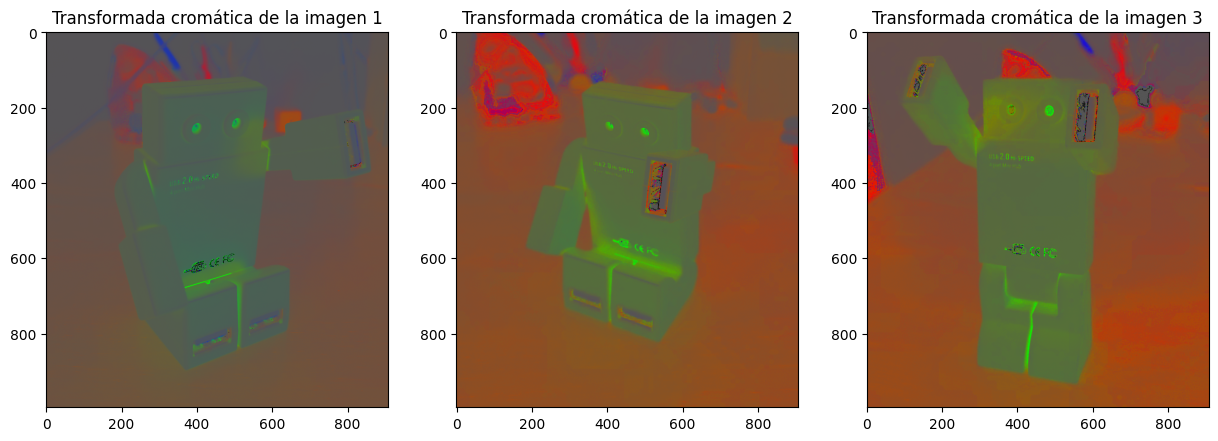

In [ ]:
# Prepara el figure para el gráfico
fig, ax = plt.subplots(1,3, figsize=(15,10))

ax[0].imshow(transformacion_cromatica(img_1_rgb))
ax[0].set_title('Transformada cromática de la imagen 1')
ax[1].imshow(transformacion_cromatica(img_2_rgb))
ax[1].set_title('Transformada cromática de la imagen 2')
ax[2].imshow(transformacion_cromatica(img_3_rgb))
ax[2].set_title('Transformada cromática de la imagen 3')
plt.show()

Luego de la aplicación del algoritmo vemos que independientemente de la iluminación es posible identificar detalles del objeto.

# Algoritmo de White-Patch

Sus premisas  son:

Asumimos que los valores máximos de color en los
tres canales es el color del blanco bajo la luz de la
escena.

Se calculan los máximos por canal

* Rmax Img :Valor máximo del canal R de la imagen
* Gmax Img : Valor máximo del canal G de la imagen
* Bmax Img :Valor máximo del canal B de la imagen

Normalizamos entonces al color de la luz blanca puro
(255, 255, 255)

$$\begin{equation} (R, G, B )= (\frac{255}{Rmax} R, \frac{255}{Gmax} G, \frac{255}{Bmax} B ) \end{equation} $$

In [ ]:
def white_patch_algorithm(img):

    # Convertir la imagen a un array de NumPy
    img_array = np.array(img)

    # Encontrar el pixel más brillante de la imagen
    max_pixel = np.max(img_array, axis=(0, 1))

    # Calcular los factores de escala para cada canal
    scale_factors = 255 / max_pixel

    # Aplicar los factores de escala a cada canal de color
    corrected_img = np.clip(img_array * scale_factors[None, None, :], 0, 255).astype(np.uint8)

    return corrected_img

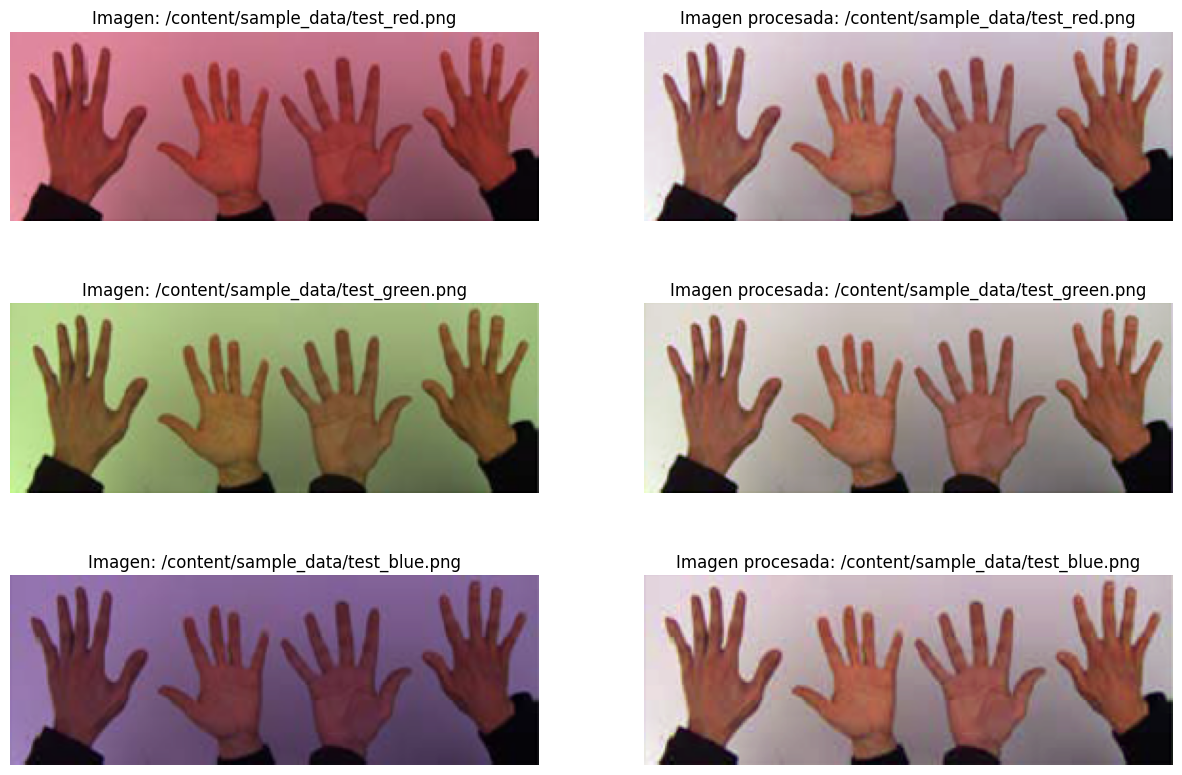

In [ ]:
images = ['/content/sample_data/test_red.png', '/content/sample_data/test_green.png', '/content/sample_data/test_blue.png']

# Crea el figure para mostrar las imagenres
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

for i, image in enumerate(images):
    # Carga la imagen para su posterior procesamiento
    img = cv2.imread(image)

    # Corrección de balance usando el algoritmo White_patch
    balanced_image = white_patch_algorithm(img)

    # Muestra la imagen original y la procesada
    axs[i, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[i, 0].set_title(f"Imagen: {image}")
    axs[i, 0].axis('off')
    axs[i, 1].imshow(cv2.cvtColor(balanced_image, cv2.COLOR_BGR2RGB))
    axs[i, 1].set_title(f"Imagen procesada: {image}")
    axs[i, 1].axis('off')

El algoritmo mejora la visualización y disminuye los efectos ocasionados por el color de la iluminación.

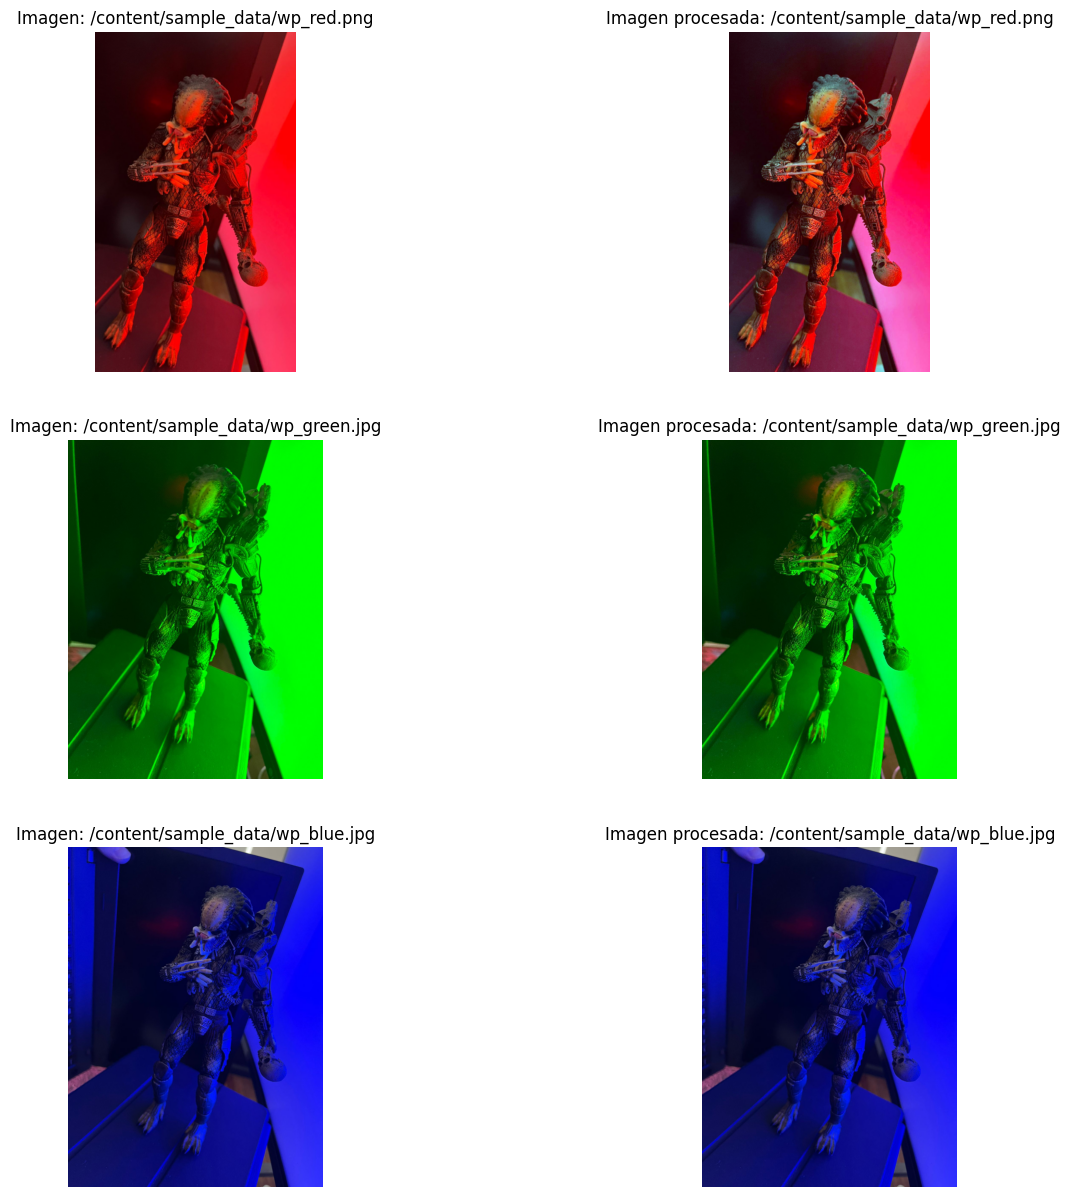

In [ ]:
images = ['/content/sample_data/wp_red.png', '/content/sample_data/wp_green.jpg', '/content/sample_data/wp_blue.jpg']

# Crea el figure para mostrar las imagenres
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

for i, image in enumerate(images):
    # Carga la imagen para su posterior procesamiento
    img = cv2.imread(image)

    # Corrección de balance usando el algoritmo White_patch
    balanced_image = white_patch_algorithm(img)

    # Muestra la imagen original y la procesada
    axs[i, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[i, 0].set_title(f"Imagen: {image}")
    axs[i, 0].axis('off')
    axs[i, 1].imshow(cv2.cvtColor(balanced_image, cv2.COLOR_BGR2RGB))
    axs[i, 1].set_title(f"Imagen procesada: {image}")
    axs[i, 1].axis('off')

El algoritmo White Patch ha realizado una corrección de color, disminuyendo el efecto de la iluminación de la fuente de luz.

# Parte 2

Previsualizar las imagenes **img1_tp.png** y **img2_tp.png**  con OpenCV en escalas de grises.

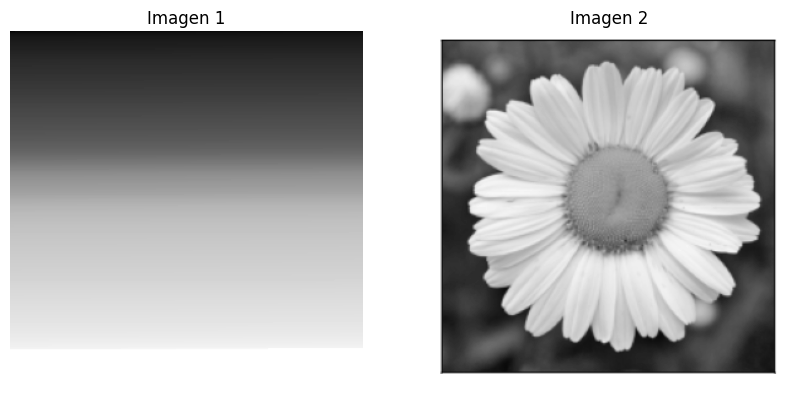

In [ ]:
image_gray_1 = cv2.imread('/content/sample_data/img1_tp.png', cv2.IMREAD_GRAYSCALE)
image_gray_2 = cv2.imread('/content/sample_data/img2_tp.png', cv2.IMREAD_GRAYSCALE)

# Prepara el figure para mostrar las imagenes
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image_gray_1, cmap='gray')
ax[0].set_title('Imagen 1')
ax[0].axis('off')
ax[1].imshow(image_gray_2, cmap='gray')
ax[1].set_title('Imagen 2')
ax[1].axis('off')

plt.show()


Elija el número de bins crea conveniente y grafique su histograma, compare los histogramas entre sí. Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, ¿cónsidera que puede ser de utilidad tomar como "features" a los histogramas?.

Text(0.5, 1.0, 'Histograma de image_gray_2')

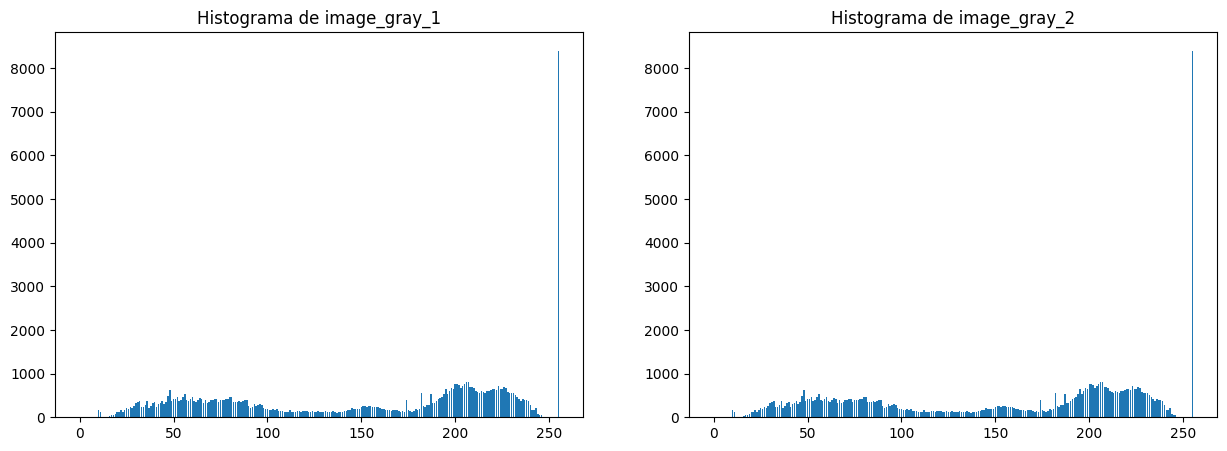

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

box, bins = np.histogram(image_gray_1, bins=256, range=(0, 256))
ax[0].bar(bins[:-1], box)
ax[0].set_title("Histograma de image_gray_1")


flower, bins = np.histogram(image_gray_2, bins=256, range=(0, 256))
ax[1].bar(bins[:-1], flower)
ax[1].set_title("Histograma de image_gray_2")

En primer lugar se evidencia que, aunque las imagenes son visiblemente diferentes poseen el mismo histograma de intensidad.

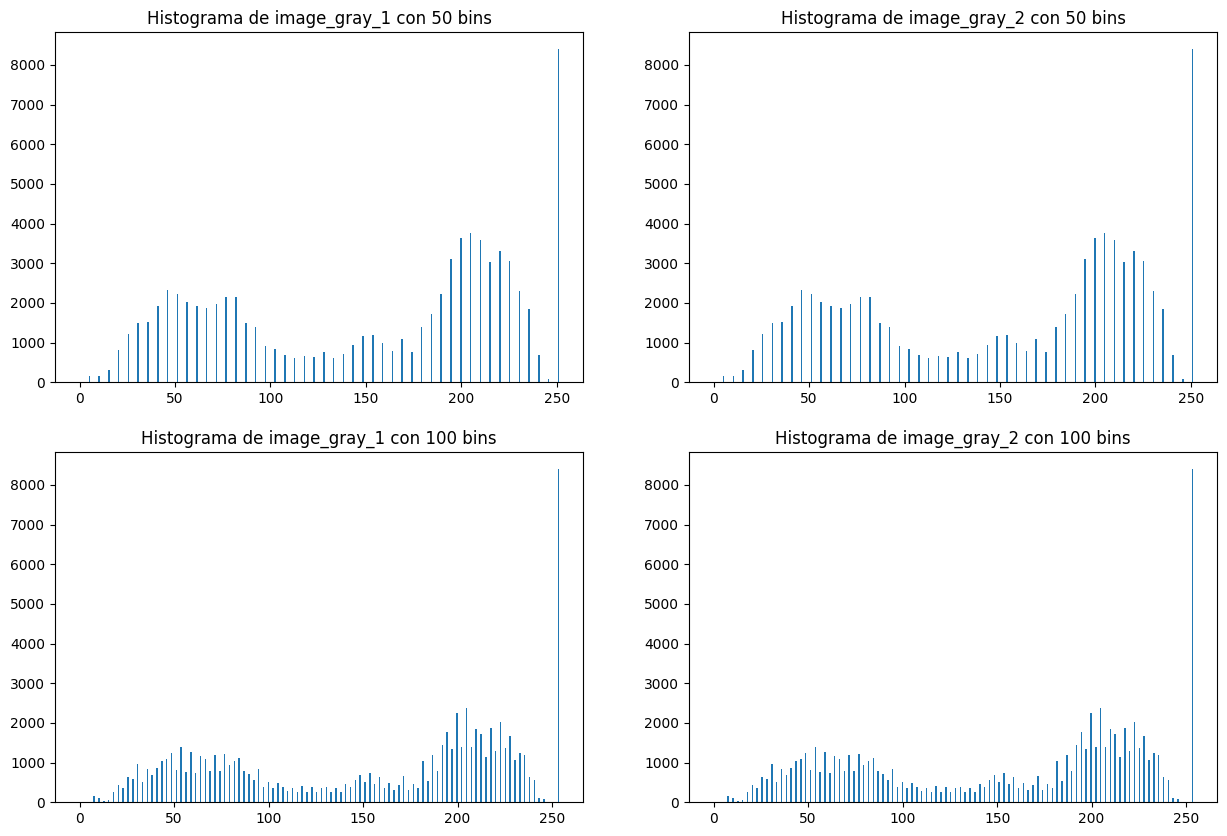

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
box, bins = np.histogram(image_gray_1, bins=50, range=(0, 256))
ax[0,0].bar(bins[:-1], box)
ax[0,0].set_title("Histograma de image_gray_1 con 50 bins")


flower, bins = np.histogram(image_gray_2, bins=50, range=(0, 256))
ax[0,1].bar(bins[:-1], flower)
ax[0,1].set_title("Histograma de image_gray_2 con 50 bins")

box, bins = np.histogram(image_gray_1, bins=100, range=(0, 256))
ax[1,0].bar(bins[:-1], box)
ax[1,0].set_title("Histograma de image_gray_1 con 100 bins")


flower, bins = np.histogram(image_gray_2, bins=100, range=(0, 256))
ax[1,1].bar(bins[:-1], flower)
ax[1,1].set_title("Histograma de image_gray_2 con 100 bins")
plt.show()

Independientemente del número de bins ambos histogramas son idénticos por lo que, para este caso en particular, **no** representan un diferenciador entre ambas imágenes.

# Segmentación de Imagen

Para la imagen **segmentacion.png** analice el histograma de canales RGB. Segmente algunos de los elementos presentes en la imagen (agua, cielo y tierra) y muestre, aplicando mascaras, las regiones en imagenes separadas.

In [ ]:
# Carga de la imagen
img = cv2.imread('/content/sample_data/segmentacion.png')


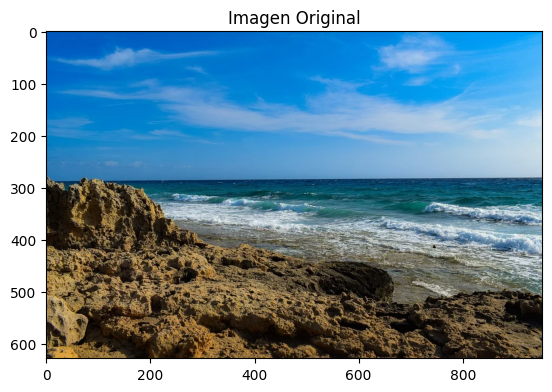

In [ ]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Ploteo de la imagen original
plt.figure()
plt.imshow(img_rgb)
plt.title('Imagen Original')
plt.show()

In [ ]:
# Dimensión de la imagen
print(f'La imagen representa un arreglo de {img_1_rgb.shape[0]} x {img_1_rgb.shape[1]} pixels y {img_1_rgb.shape[2]} canales')

La imagen representa un arreglo de 996 x 908 pixels y 3 canales


# Representación de los histogramas

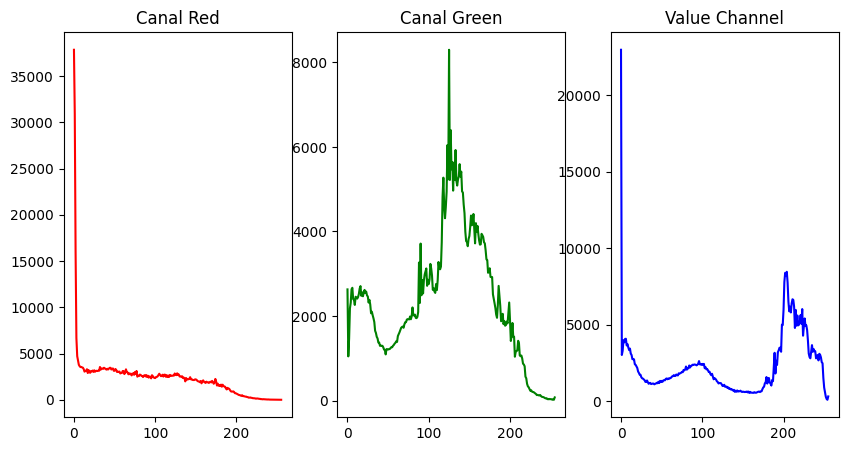

In [ ]:
# División por canales
r,g,b = cv2.split(img_rgb)
histr, binr = np.histogram(r.ravel(), 256, [0, 256])
histg, binc = np.histogram(g.ravel(), 256, [0, 256])
histb, binb = np.histogram(b.ravel(), 256, [0, 256])

fig, ax = plt.subplots(1,3, figsize=(10,5))

ax[0].plot(histr, color='red')
ax[0].set_title('Canal Red')
ax[1].plot(histg, color='green')
ax[1].set_title('Canal Green')
ax[2].plot(histb, color='blue')
ax[2].set_title('Value Channel')
plt.show()

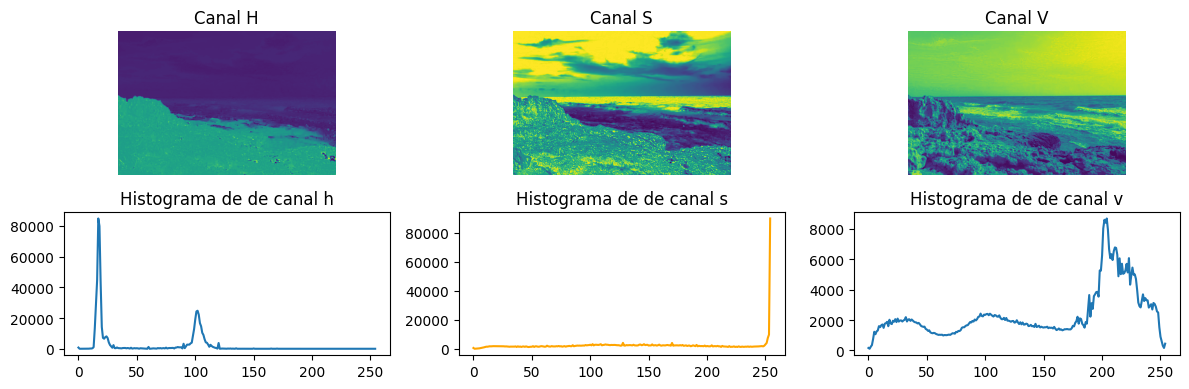

In [ ]:
# DIvisión por los canales hsv
imgHSV = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(imgHSV)
histh,binsh = np.histogram(h.ravel(),255,[0,255])
hists,binss = np.histogram(s.ravel(),255,[0,255])
histv,binsv = np.histogram(v.ravel(),255,[0,255])

# Crear la figura con 3 subgráficos
fig, ax = plt.subplots(2, 3, figsize=(12, 4))

# Gráfico del canal H
ax[0,0].imshow(imgHSV[:, :, 0])
ax[0,0].set_title('Canal H')
ax[0,0].axis('off')

# Gráfico del canal S
ax[0,1].imshow(imgHSV[:, :, 1])
ax[0,1].set_title('Canal S')
ax[0,1].axis('off')

# Gráfico del canal V
ax[0,2].imshow(imgHSV[:, :, 2])
ax[0,2].set_title('Canal V')
ax[0,2].axis('off')

# Histograma del canal H
ax[1,0].plot(histh)
ax[1,0].set_title("Histograma de de canal h")


# Histograma del canal S
ax[1,1].plot(hists, color='orange')
ax[1,1].set_title('Histograma de de canal s')


# Histograma del canal V
ax[1,2].plot(histv)
ax[1,2].set_title('Histograma de de canal v')


plt.tight_layout()
plt.show()

# Primera aproximación para el cielo.

Se esperaría que el cielo este represantado por aquellos pixels que tengan mayor intensidad en el canal azul.

Tomando como punto de partida ideas sugeridas por el histograma para segmentar los pixeles cuya intensidad del canal "B" sea superior a 160.

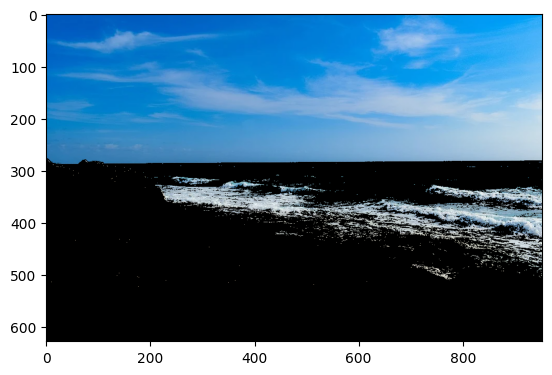

In [ ]:
mask = cv2.inRange(img_rgb[:,:,2],162,255)
img_segmentada = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)
plt.figure()
plt.imshow(img_segmentada)
plt.show()

Segmentar y separar el cielo del mar requerirá un análisis más detallado para mejorar las mascaras.

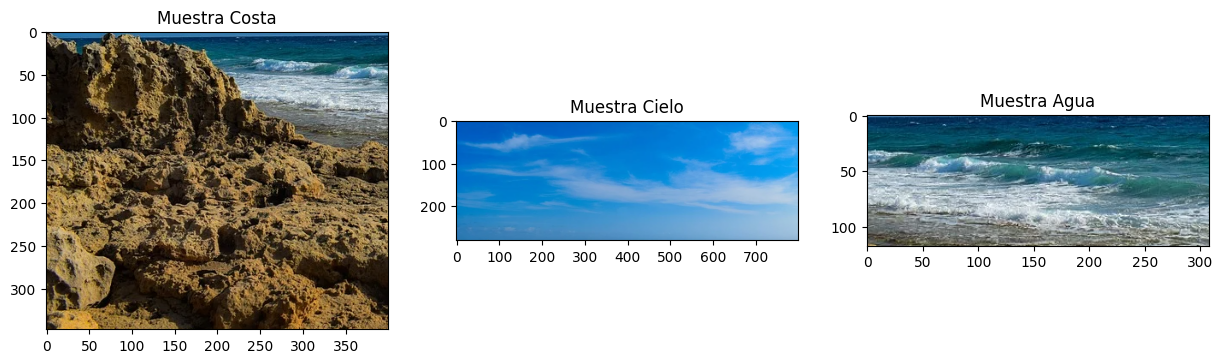

In [ ]:
# Hacemos una descripcion estadistica
muestra_land = img_rgb[280:800, 0:400, :]
muestra_sky = img_rgb[0:280, 0:800, :]
muestra_water = img_rgb[284:402, 292:600, :]

fig, ax = plt.subplots(1,3, figsize=(15,10))

ax[0].imshow(muestra_land)
ax[0].set_title('Muestra Costa')
ax[1].imshow(muestra_sky)
ax[1].set_title('Muestra Cielo')
ax[2].imshow(muestra_water)
ax[2].set_title('Muestra Agua')
plt.show()

 Considerando que tanto el cielo como el mar tienen elevada intensidad en lel canal B (azul), entonces separar el cielo del mar requerirá un análisis más detallado. Por lo que se añaden las dimensiones en el espacio HSV ("Hue", "Saturation" y "Value").

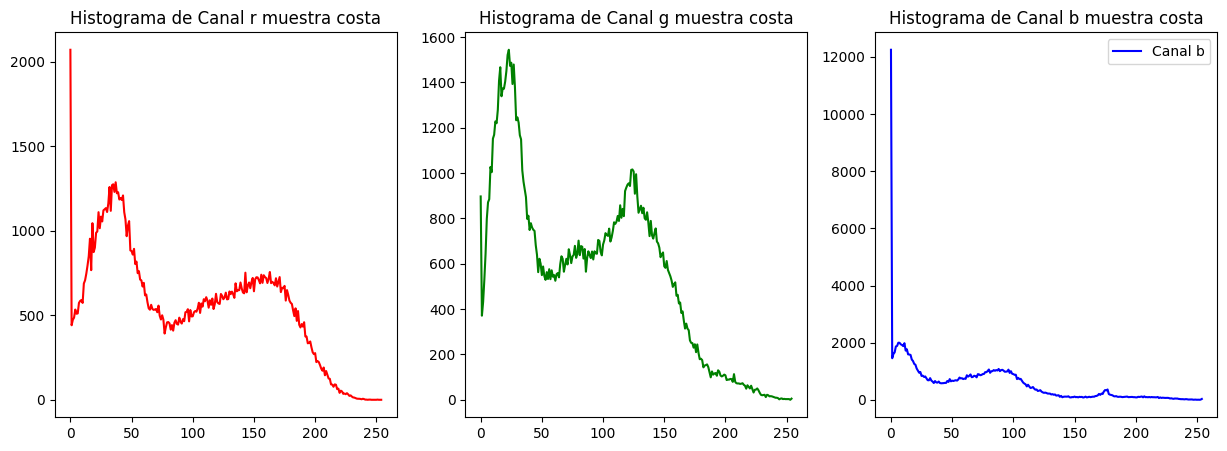

In [ ]:
r_land, g_land, b_land = cv2.split(muestra_land)
histr,binsr = np.histogram(r_land.ravel(),255,[0,255])
histg,binsg = np.histogram(g_land.ravel(),255,[0,255])
histb,binsb = np.histogram(b_land.ravel(),255,[0,255])

fix, ax= plt.subplots(1,3, figsize=(15,5))
ax[0].plot(histr, label='Canal r', color='red')
ax[0].set_title('Histograma de Canal r muestra costa')
ax[1].plot(histg, label='Canal g ', color='green')
ax[1].set_title('Histograma de Canal g muestra costa')
ax[2].plot(histb, label='Canal b', color='blue')
ax[2].set_title('Histograma de Canal b muestra costa')
plt.legend()
plt.show()

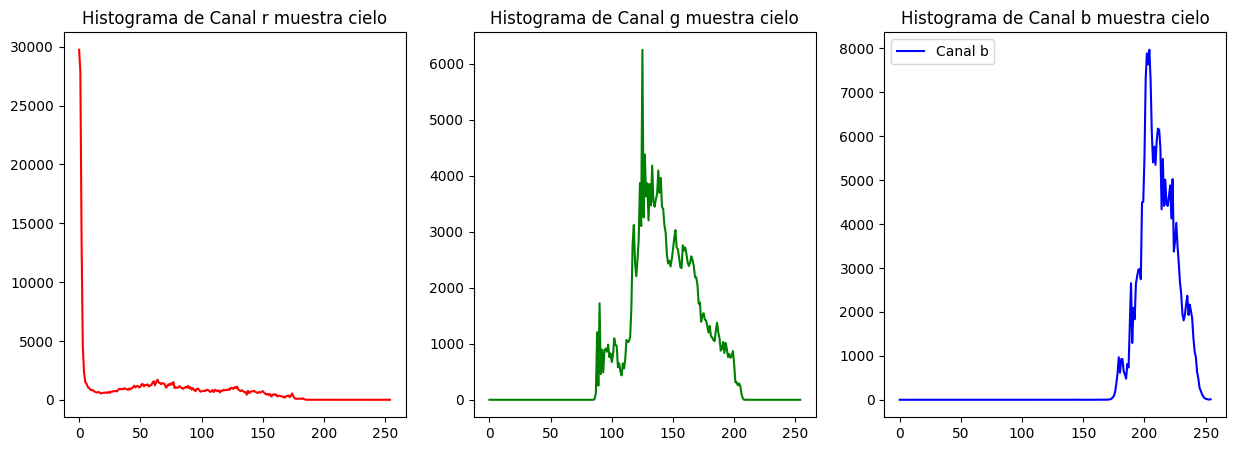

In [ ]:
r_sky, g_sky, b_sky = cv2.split(muestra_sky)
histr,binsr = np.histogram(r_sky.ravel(),255,[0,255])
histg,binsg = np.histogram(g_sky.ravel(),255,[0,255])
histb,binsb = np.histogram(b_sky.ravel(),255,[0,255])

fix, ax= plt.subplots(1,3, figsize=(15,5))
ax[0].plot(histr, label='Canal r', color='red')
ax[0].set_title('Histograma de Canal r muestra cielo')
ax[1].plot(histg, label='Canal g ', color='green')
ax[1].set_title('Histograma de Canal g muestra cielo')
ax[2].plot(histb, label='Canal b', color='blue')
ax[2].set_title('Histograma de Canal b muestra cielo')
plt.legend()
plt.show()

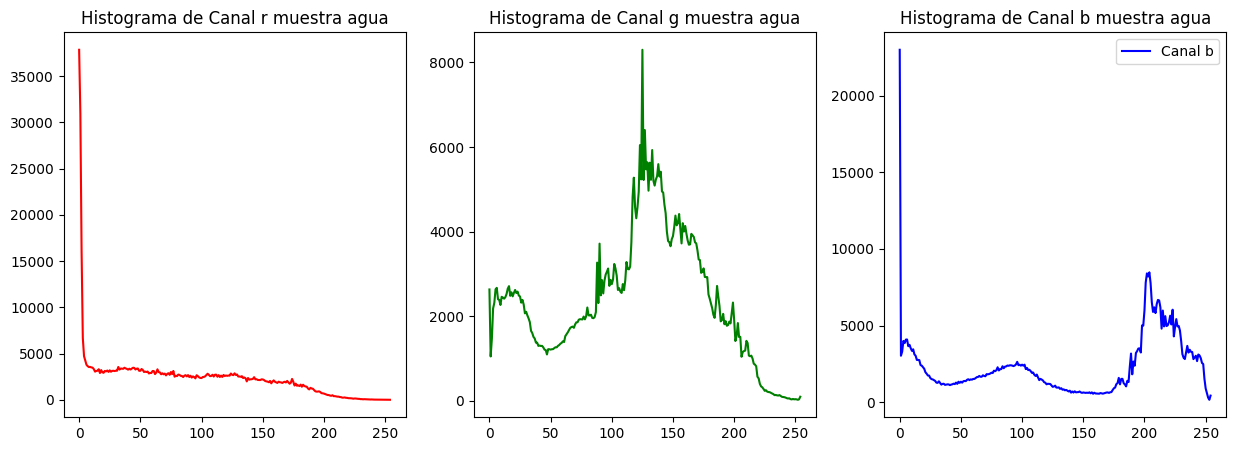

In [ ]:
r_water, g_water,b_water = cv2.split(muestra_water)
histr,binsr = np.histogram(r.ravel(),255,[0,255])
histg,binsg = np.histogram(g.ravel(),255,[0,255])
histb,binsb = np.histogram(b.ravel(),255,[0,255])

fix, ax= plt.subplots(1,3, figsize=(15,5))
ax[0].plot(histr, label='Canal r', color='red')
ax[0].set_title('Histograma de Canal r muestra agua')
ax[1].plot(histg, label='Canal g ', color='green')
ax[1].set_title('Histograma de Canal g muestra agua')
ax[2].plot(histb, label='Canal b', color='blue')
ax[2].set_title('Histograma de Canal b muestra agua')
plt.legend()
plt.show()

Se puede observar cosas como que la sección de costa tiene valores más intensos en el canal "red", que las otras dos muestras.

En cuanto al cielo y el mar, se evidencia que los pixeles tiene elevada intensidad para los canales "green" y "blue".



Hace falta un poco más de análisis para separar el cielo del mar. Por lo que avanzamos con el análisis de algunas muestras para poder ver diferencias que permitan categorizar de manera más eficiente.

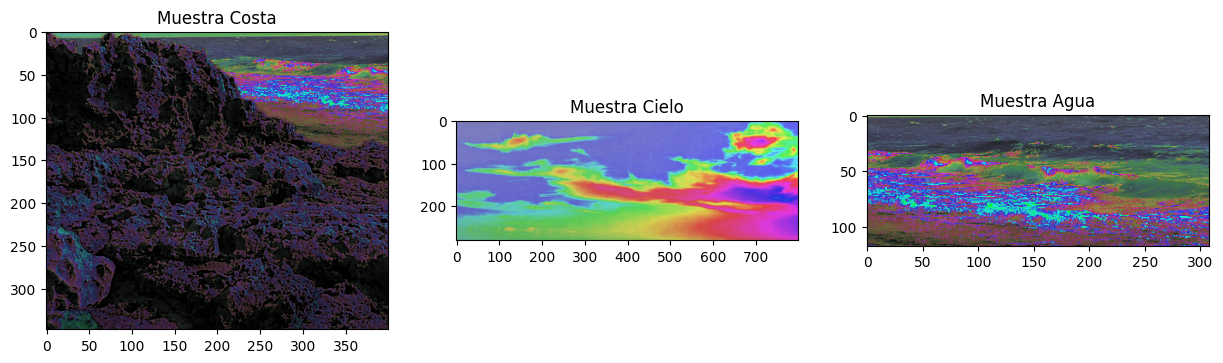

In [ ]:
muestra_land_hsv = cv2.cvtColor(muestra_land, cv2.COLOR_HSV2BGR)
muestra_sky_hsv = cv2.cvtColor(muestra_sky, cv2.COLOR_HSV2BGR)
muestra_water_hsv = cv2.cvtColor(muestra_water, cv2.COLOR_HSV2BGR)

fig, ax = plt.subplots(1,3, figsize=(15,10))
ax[0].imshow(muestra_land_hsv)
ax[0].set_title('Muestra Costa')
ax[1].imshow(muestra_sky_hsv)
ax[1].set_title('Muestra Cielo')
ax[2].imshow(muestra_water_hsv)
ax[2].set_title('Muestra Agua')
plt.show()


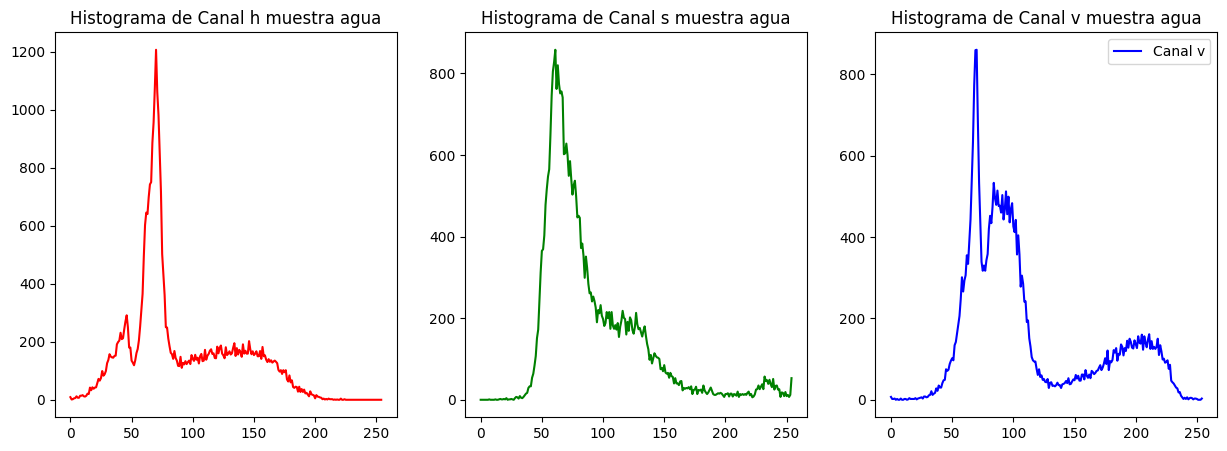

In [ ]:
h_water,s_water,v_water = cv2.split(muestra_water_hsv)
histh,binsh = np.histogram(h_water.ravel(),255,[0,255])
hists,binss = np.histogram(s_water.ravel(),255,[0,255])
histv,binsv = np.histogram(v_water.ravel(),255,[0,255])

fix, ax= plt.subplots(1,3, figsize=(15,5))
ax[0].plot(histh, label='Canal h', color='red')
ax[0].set_title('Histograma de Canal h muestra agua')
ax[1].plot(hists, label='Canal s ', color='green')
ax[1].set_title('Histograma de Canal s muestra agua')
ax[2].plot(histv, label='Canal v', color='blue')
ax[2].set_title('Histograma de Canal v muestra agua')
plt.legend()
plt.show()



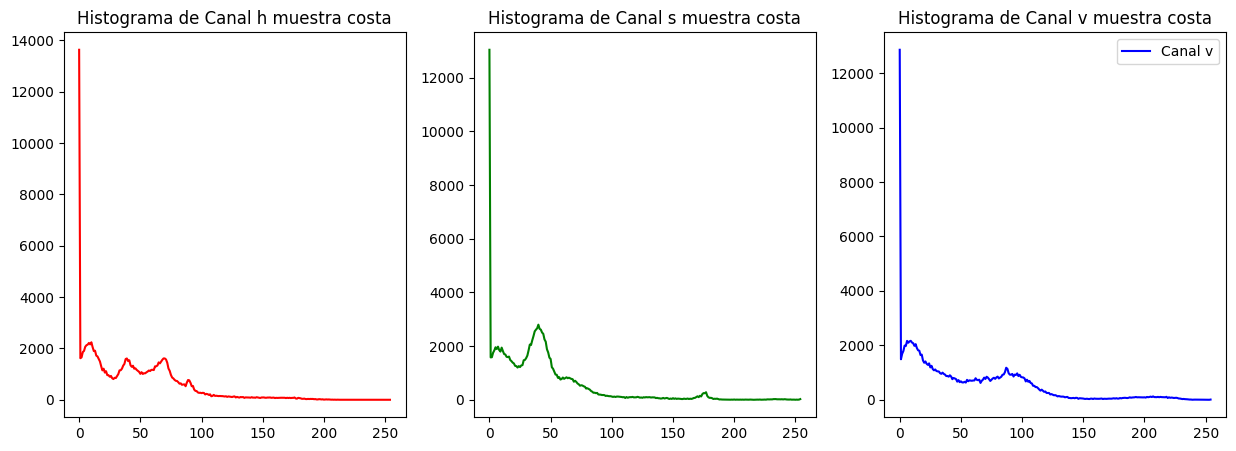

In [ ]:
h_land,s_land,v_land = cv2.split(muestra_land_hsv)
histh,binsh = np.histogram(h_land.ravel(),255,[0,255])
hists,binss = np.histogram(s_land.ravel(),255,[0,255])
histv,binsv = np.histogram(v_land.ravel(),255,[0,255])

fix, ax= plt.subplots(1,3, figsize=(15,5))
ax[0].plot(histh, label='Canal h', color='red')
ax[0].set_title('Histograma de Canal h muestra costa')
ax[1].plot(hists, label='Canal s ', color='green')
ax[1].set_title('Histograma de Canal s muestra costa')
ax[2].plot(histv, label='Canal v', color='blue')
ax[2].set_title('Histograma de Canal v muestra costa')
plt.legend()
plt.show()


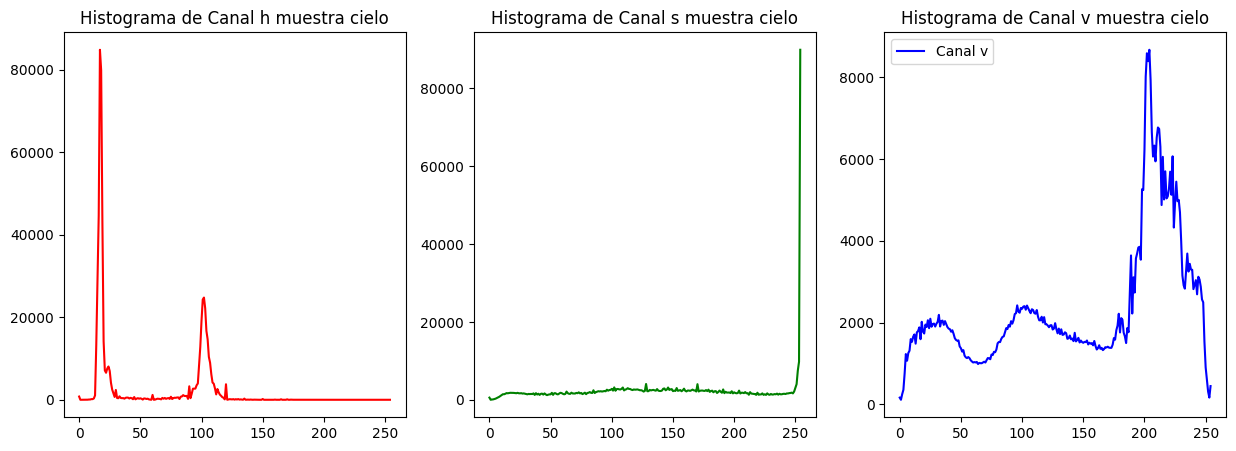

In [ ]:
h_sky,s_sky,v_sky = cv2.split(muestra_sky_hsv)
histh,binsh = np.histogram(h.ravel(),255,[0,255])
hists,binss = np.histogram(s.ravel(),255,[0,255])
histv,binsv = np.histogram(v.ravel(),255,[0,255])

fix, ax= plt.subplots(1,3, figsize=(15,5))
ax[0].plot(histh, label='Canal h', color='red')
ax[0].set_title('Histograma de Canal h muestra cielo')
ax[1].plot(hists, label='Canal s ', color='green')
ax[1].set_title('Histograma de Canal s muestra cielo')
ax[2].plot(histv, label='Canal v', color='blue')
ax[2].set_title('Histograma de Canal v muestra cielo')
plt.legend()
plt.show()

Los canales de h, s y v muestran algunas diferencias para cada una de las muestras, por lo que serán utilizadas más adelante para la segmentación.

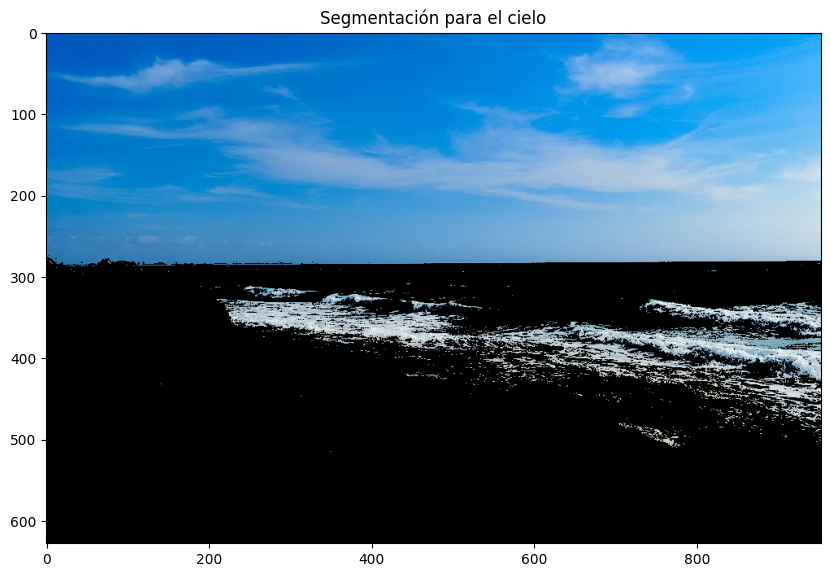

In [ ]:
# Umbral para el canal blue
sky_min_th_b = 171
sky_max_th_b = 255

mask = cv2.inRange(img_rgb[:,:,2], sky_min_th_b, sky_max_th_b)
img_segmentada = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)
plt.figure(figsize=(10, 10))
plt.imshow(img_segmentada)
plt.title('Segmentación para el cielo')
plt.show()

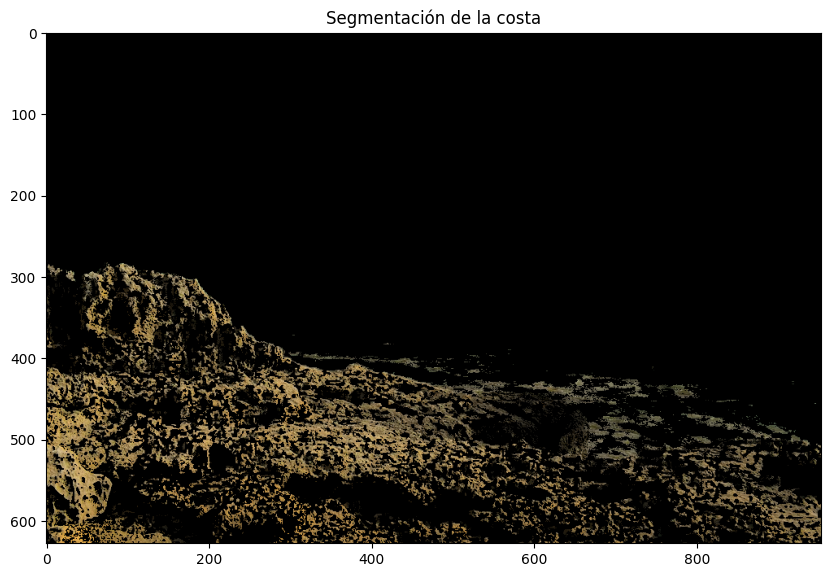

In [ ]:
# Umbral para land
min_umbral = (60, 50, 20)
max_umbral = (102.5, 180, 255)


mask_land = cv2.inRange(imgHSV, min_umbral, max_umbral)
img_segmentada = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_land)
plt.figure(figsize=(10, 10))
plt.imshow(img_segmentada)
plt.title( "Segmentación de la costa" )
plt.show()

Para proceder a la segmentación del mar en la imagen, procederemos a un análisis algo más detallado considerango que tanto el cielo como el mar tienen picos en el canal Azul que los asemeja y por tanto dificulta el segmentado.

Por lo que, para segmentar el mar utilizaremos nos apoyamos en otro espacio de color para extraer otros insights.

* Valores de 0 a 90 para el canal de Hue
* Valores de 60 a 150 para el canal de Value


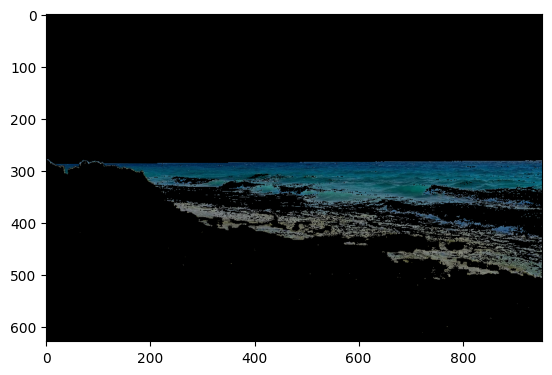

In [ ]:
mascara = cv2.inRange(imgHSV[:,:,2],60,150)

mascara1 = cv2.inRange(imgHSV[:,:,0],0,90)

mask = cv2.bitwise_and(mascara, mascara1)
#iagua = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)
iagua = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)
plt.imshow(iagua)


# Conclusión

Para afrontar tareas de segmentación resulta indispensable el manejo adecuado de espacios de colores y el análisis de histogramas para poder encontrar los mejores atributos que representarían a cada una de las clases a segmentar.

Categorías como "cielo" y "agua", en este caso particular , contienen similares patrones de intensidad de azul y de modo análogo en el canal "verde" por lo que se ve necesario ahondar en el estudio de estos casos.

Para este Tp, consideramos analizar el espacio HSV para mejorar la segmentación (aunque pensamos en realizar algún análisis gausiano como descriptor).